<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import unicodedata
import random
from train import training, load_data, evaluate
from util import  df_tolist
from sklearn.utils import shuffle

In [4]:

# change to dataframe to Spacy format
# wikidata featured articles scraped text
df = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/src/Notebooks/wiki_data.csv', encoding = 'utf8')
df = df[(df['Statements'].str.split().str.len() >10)].reset_index(drop=True)
df['Statements'] = df['Statements'].astype(str)
df =shuffle(df)
df = df.drop_duplicates()
print(df.shape)
print(df.label.value_counts())
df.head()

(19993, 2)
0    9999
1    9994
Name: label, dtype: int64


,Statements,label
18566,Sports programming is also provided on some we...,0
83,"In 1807, mint Director Robert Patterson in a l...",1
2455,Some bones also show evidence of having been b...,1
15802,"The case was brought after Jeffrey Heffernan, ...",0
7835,"As with residents and transients, the lifesty...",1


In [5]:
# Processing the final format of training and validation data
# Calling the load_data() function 
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(df,split=0.8)
train_data = list(zip(train_texts,[{'cats': cats} for cats in train_cats]))
print(train_data[:1])
dev_data = list(zip(dev_texts,[{'cats': cats} for cats in dev_cats]))
print(dev_data[:1])


[("Two critics who have analyzed the role of the speech find different ties between Jules' transformation and the issue of postmodernity. Gormley argues that unlike the film's other major characters — Marsellus aside — Jules is:", {'cats': {'POSITIVE': False, 'NEGATIVE': True}})]
[('Almost every sizeable body of water in Scotland has an associated kelpie story, but the most extensively reported is that of Loch Ness. Parallels to the general Germanic neck or nixie and the Scandinavian bäckahäst have been observed. More widely, the wihwin of Central America and the Australian bunyip have been seen as counterparts. The origin of the belief in malevolent water horses has been proposed as originating in human sacrifices once made to appease gods associated with water, but narratives about the kelpie also served a practical purpose in keeping children away from dangerous stretches of water, and warning young women to be wary of handsome strangers.', {'cats': {'POSITIVE': False, 'NEGATIVE':

E:\Sharpest_Mind\WikipediaCitation\src\Notebooks\util.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tuples'] = df.apply(lambda row: (row[df.columns[0]], row[df.columns[1]]), axis=1)


In [6]:

# change to dataframe to Spacy format
# wikidata citation needed text
df4 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/Citation_needed_wiki.csv', encoding = 'ISO-8859-1')
df4 = shuffle(df4)
df4_1 = df4[df4['label']==1] 
df4_0 = df4[df4['label']==0]
df4_test = pd.concat([df4_1[:2000],df4_0[:2000]])
test1 =df_tolist(df4_test)
test_texts1, test_cats1 = zip(*test1)
test_cats1 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats1]
test_data1 = list(zip(test_texts1,[{'cats': cats} for cats in test_cats1]))
print(len(test_data1))

4000


In [7]:

# wikidata random articles -biography section
df5 = pd.read_csv('E:/Sharpest_Mind/WikipediaCitation/data/processed/csv_files/sort/wiki_data_test.csv', encoding = 'ISO-8859-1')
df5 = shuffle(df5)
df5_1 = df5[df5['Label']==1] 
df5_0 = df5[df5['Label']==0]
df5_test = pd.concat([df5_1[8000:],df5_0[8000:]])
test2 =df_tolist(df5_test)

random.shuffle(test2)

test_texts2, test_cats2 = zip(*test2)
test_cats2 = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)} for y in test_cats2]
test_data2 = list(zip(test_texts2,[{'cats': cats} for cats in test_cats2]))
print(len(test_data2))

3980


In [8]:
print(len(train_data))
print(len(test_data1))
print(len(test_data2))
print(len(dev_data))

15994
4000
3980
3999


In [9]:
# Model 1 - Ensemble, L2 =2e-4
train_results1, dev_results1, test_results1 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-5, 
                                                     learn_rate = 0.001, n_iter = 3, output_dir='model_artifactnWikidatatest1L2-2e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
13.7914	0.9659	0.9207	0.8632	0.9766	0.9544	0.9654
2.4377	0.9805	0.9732	0.9400	0.9653	0.9967	0.9808
1.6478	0.9818	0.9767	0.9412	0.9658	0.9989	0.9821
Saved model to model_artifactnWikidatatest1L2-2e-5


In [12]:
### Model 2 - Ensemble, L2 0.0001 
train_results2, dev_results2, test_results2 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts2, test_cats2, L2 = 2e-5, 
                                                     learn_rate = 0.001, n_iter=3,  output_dir='model_artifactwikitest2-2e-5')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
13.5634	0.9721	0.9422	0.7417	0.9684	0.9766	0.9725
2.6012	0.9802	0.9740	0.8427	0.9800	0.9808	0.9804
1.4221	0.9899	0.9812	0.8641	0.9854	0.9947	0.9900
Saved model to model_artifactwikitest2-2e-5


In [14]:
# Model 3
train_restul3, dev_results3, test_result3 = training(train_texts, train_cats, dev_texts, dev_cats, test_texts1, test_cats1, L2 = 2e-4, 
                                                     learn_rate = 0.001, n_iter = 3, output_dir='model_artifactwikitest1e-4')

Training the model...
LOSS 	A_train	A_dev	A_test	  P  	  R  	  F  
13.6119	0.9680	0.9480	0.9080	0.9736	0.9627	0.9681
2.6732	0.9766	0.9752	0.9485	0.9845	0.9688	0.9766
2.0029	0.9815	0.9802	0.9510	0.9876	0.9756	0.9816
Saved model to model_artifactwikitest12e-4


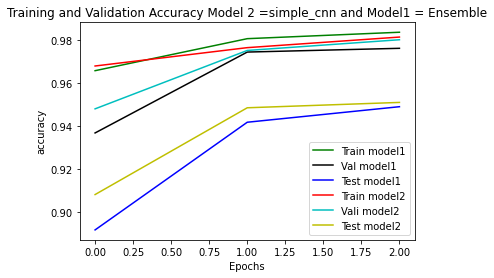

In [16]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_results1]
accuracy_dev = [(d['textcat_a']) for d in dev_results1]
accuracy_test = [(d['textcat_a']) for d in test_results1]
accuracy_train1 = [(d['textcat_a']) for d in train_restul3]
accuracy_dev1 = [(d['textcat_a']) for d in dev_results3]
accuracy_test1 = [(d['textcat_a']) for d in test_result3]
epochs = range(0,3)
plt.plot(epochs, accuracy_train, 'g', label='Train model1')
plt.plot(epochs, accuracy_dev, 'k', label='Val model1')
plt.plot(epochs, accuracy_test, 'b', label='Test model1')
plt.plot(epochs, accuracy_train1, 'r', label='Train model2')
plt.plot(epochs, accuracy_dev1, 'c', label='Val model2')
plt.plot(epochs, accuracy_test1, 'y', label='Test model2')
plt.title('Training and Validation Accuracy Model 2 =simple_cnn and Model1 = Ensemble')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig(wiki_)
plt.show()

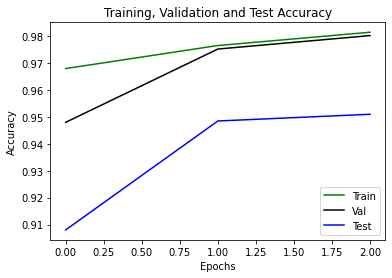

In [29]:
import matplotlib.pyplot as plt

accuracy_train = [(d['textcat_a']) for d in train_restul3]
accuracy_dev = [(d['textcat_a']) for d in dev_results3]
accuracy_test = [(d['textcat_a']) for d in test_result3]

epochs = range(0,3)
plt.plot(epochs, accuracy_train, 'g', label='Train')
plt.plot(epochs, accuracy_dev, 'k', label='Val')
plt.plot(epochs, accuracy_test, 'b', label='Test')

plt.title('Training, Validation and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

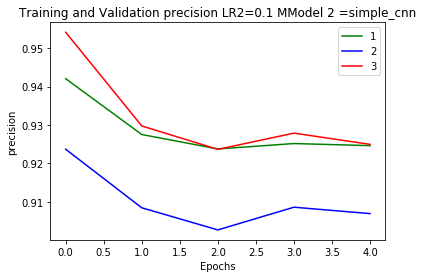

In [14]:
import matplotlib.pyplot as plt

precision_test1 = [(d['textcat_p']) for d in test_results1]
precision_test2 = [(d['textcat_p']) for d in test_results2]
precision_test3 = [(d['textcat_p']) for d in test_result3]
#precision_test4 = [(d['textcat_p']) for d in test_result4]

epochs = range(0,5)
plt.plot(epochs, precision_test1, 'g', label='1 - LR')
plt.plot(epochs, precision_test2, 'b', label='2 - LR :2e-4&cnn')
plt.plot(epochs, precision_test3, 'r', label='3')
#plt.plot(epochs, precision_test4, 'c', label='4')
plt.title('Training and Validation precision 1 = =simple_cnn')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

In [18]:
import spacy


In [17]:
# Testing the model - negative sentence
import spacy
loaded_model = spacy.load('E:/Sharpest_Mind/WikipediaCitation/src/Models/model_artifactnWikidataL2-2e-4')
test_text="Later, during the Age of Exploration, maps became progressively more accurate for navigation needs and were often sprinkled with sketches and drawings such as sailing ships showing the direction of trade winds, little trees and mounds to represent forests and mountains and of course, plenty of sea creatures and exotic natives much of them imaginary. "
doc=loaded_model(test_text)
doc.cats
#spacy.displacy.render(doc, style='ent')

{'POSITIVE': 0.873071014881134, 'NEGATIVE': 0.12692900002002716}

In [14]:
#positive sentence 

test_text1 = 'Anthropomorphic maps date back to when Sebastian Münster used a queen to depict Europe in 1570.'
doc=loaded_model(test_text1)
doc.cats

{'POSITIVE': 0.6513391137123108, 'NEGATIVE': 0.348660945892334}

In [15]:
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
test_text= "Such positions also allowed him to play a central role in training the militia forces who repelled the Bay of Pigs Invasion and bringing the Soviet nuclear-armed ballistic missiles to Cuba which precipitated the 1962 Cuban Missile Crisis. "
doc=loaded_model(test_text)
doc.cats

{'POSITIVE': 0.9168311357498169, 'NEGATIVE': 0.0831688940525055}

In [16]:
# Testing the model = https://en.wikipedia.org/wiki/Che_Guevara - positive sentence
test_text= "'The focus of research during the 20th century has been to understand the physical mechanisms behind friction.'"
doc=loaded_model(test_text)
doc.cats


{'POSITIVE': 0.9998383522033691, 'NEGATIVE': 0.00016162007523234934}